In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape


(891, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
data.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

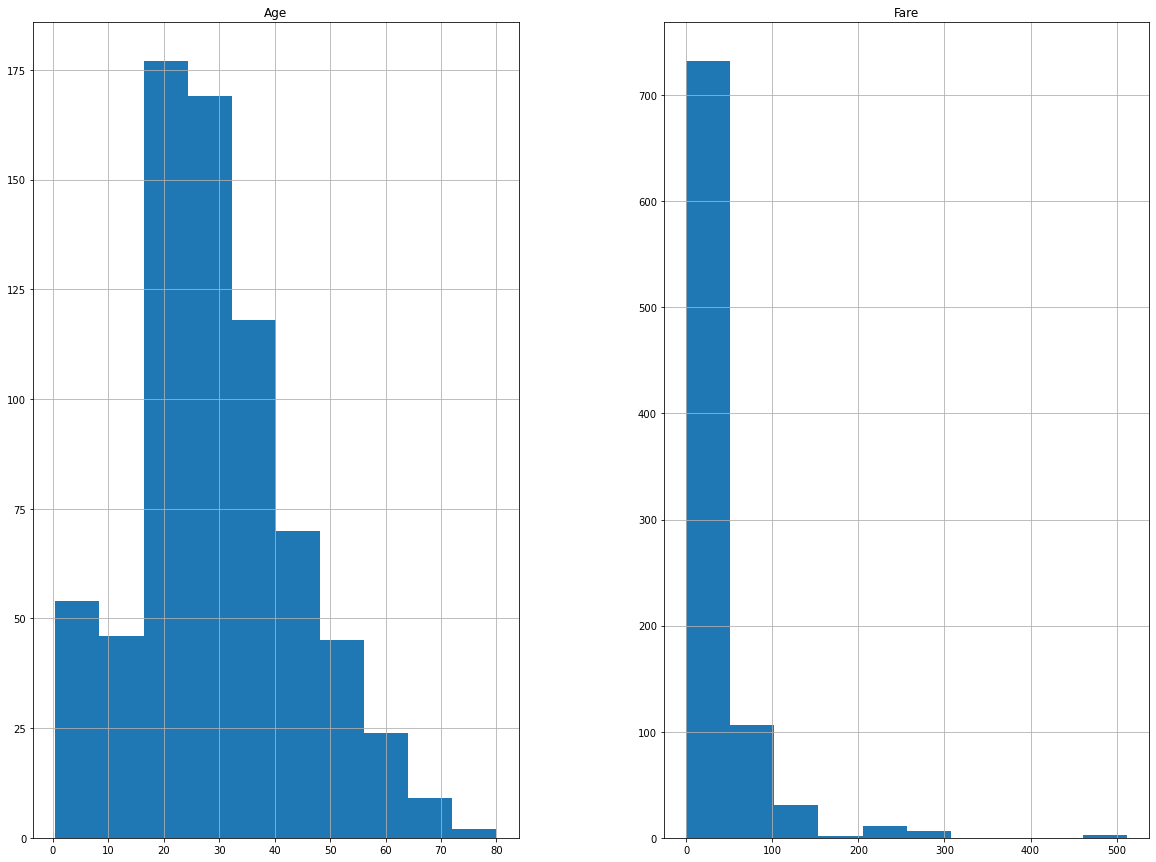

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [20]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
data.Cabin.nunique()

147

In [25]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'box plot of survived')

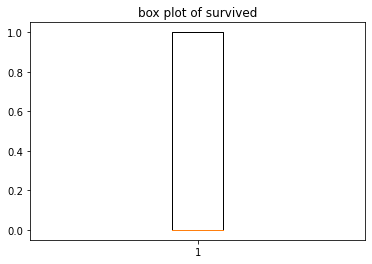

In [30]:
plt.boxplot(data['Survived'])
plt.title('box plot of survived')

Text(0.5, 1.0, 'box plot of pclass')

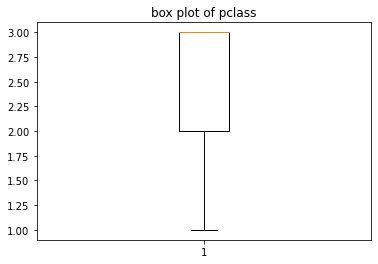

In [31]:
plt.boxplot(data['Pclass'])
plt.title('box plot of pclass')

Text(0.5, 1.0, 'box plot of Age')

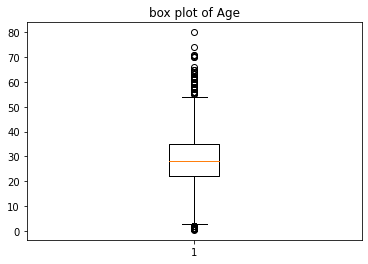

In [32]:
plt.boxplot(data['Age'])
plt.title('box plot of Age')

In [33]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [34]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [35]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3-1.5*IQR
print(low_lim)
print(up_lim)

2.5
15.5


In [39]:
outlier=[]
for x in data['Age']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [40]:
outlier

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 28.0,
 54.0,
 2.0,
 27.0,
 58.0,
 20.0,
 39.0,
 55.0,
 2.0,
 28.0,
 31.0,
 28.0,
 35.0,
 34.0,
 28.0,
 38.0,
 28.0,
 19.0,
 28.0,
 28.0,
 40.0,
 28.0,
 28.0,
 66.0,
 28.0,
 42.0,
 28.0,
 21.0,
 18.0,
 40.0,
 27.0,
 28.0,
 19.0,
 28.0,
 28.0,
 28.0,
 28.0,
 18.0,
 21.0,
 49.0,
 29.0,
 65.0,
 28.0,
 21.0,
 28.5,
 22.0,
 38.0,
 45.0,
 28.0,
 28.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 28.0,
 28.0,
 0.83,
 30.0,
 22.0,
 29.0,
 28.0,
 28.0,
 17.0,
 33.0,
 16.0,
 28.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 28.0,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 28.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 28.0,
 38.0,
 28.0,
 47.0,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 28.0,
 32.5,
 32.5,
 54.0,
 28.0,
 24.0,
 28.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 28.0,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.5,
 40.5,
 28.0,
 51.0,
 16.0,
 3

In [41]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   9,  12,  13,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=808)

Text(0.5, 1.0, 'box plot of Fare')

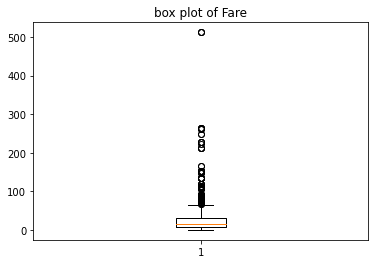

In [42]:
plt.boxplot(data['Fare'])
plt.title('box plot of Fare')

In [43]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [44]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [45]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3-1.5*IQR
print(low_lim)
print(up_lim)

-26.724
-3.6343999999999994


In [46]:
outlier=[]
for x in data['Fare']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [55]:
outlier

[7.25,
 71.2833,
 7.925,
 53.1,
 8.05,
 8.4583,
 51.8625,
 21.075,
 11.1333,
 30.0708,
 16.7,
 26.55,
 8.05,
 31.275,
 7.8542,
 16.0,
 29.125,
 13.0,
 18.0,
 7.225,
 26.0,
 13.0,
 8.0292,
 35.5,
 21.075,
 31.3875,
 7.225,
 263.0,
 7.8792,
 7.8958,
 27.7208,
 146.5208,
 7.75,
 10.5,
 82.1708,
 52.0,
 7.2292,
 8.05,
 18.0,
 11.2417,
 9.475,
 21.0,
 7.8958,
 41.5792,
 7.8792,
 8.05,
 15.5,
 7.75,
 21.6792,
 17.8,
 39.6875,
 7.8,
 76.7292,
 26.0,
 61.9792,
 35.5,
 10.5,
 7.2292,
 27.75,
 46.9,
 7.2292,
 80.0,
 83.475,
 27.9,
 27.7208,
 15.2458,
 10.5,
 8.1583,
 7.925,
 8.6625,
 10.5,
 46.9,
 73.5,
 14.4542,
 56.4958,
 7.65,
 7.8958,
 8.05,
 29.0,
 12.475,
 9.0,
 9.5,
 7.7875,
 47.1,
 10.5,
 15.85,
 34.375,
 8.05,
 263.0,
 8.05,
 8.05,
 7.8542,
 61.175,
 20.575,
 7.25,
 8.05,
 34.6542,
 63.3583,
 23.0,
 26.0,
 7.8958,
 7.8958,
 77.2875,
 8.6542,
 7.925,
 7.8958,
 7.65,
 7.775,
 7.8958,
 24.15,
 52.0,
 14.4542,
 8.05,
 9.825,
 14.4583,
 7.925,
 7.75,
 21.0,
 247.5208,
 31.275,
 73.5,
 8.05,


In [52]:
ind1=data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

Text(0.5, 1.0, 'box plot of Parch')

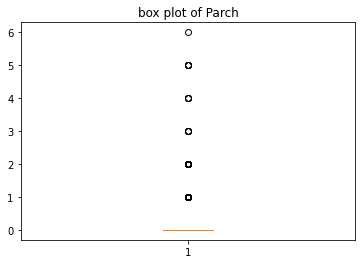

In [56]:
plt.boxplot(data['Parch'])
plt.title('box plot of Parch')

In [57]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [58]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [59]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3-1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0


In [60]:
outlier=[]
for x in data['Fare']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [61]:
outlier

[7.25,
 71.2833,
 7.925,
 53.1,
 8.05,
 8.4583,
 51.8625,
 21.075,
 11.1333,
 30.0708,
 16.7,
 26.55,
 8.05,
 31.275,
 7.8542,
 16.0,
 29.125,
 13.0,
 18.0,
 7.225,
 26.0,
 13.0,
 8.0292,
 35.5,
 21.075,
 31.3875,
 7.225,
 263.0,
 7.8792,
 7.8958,
 27.7208,
 146.5208,
 7.75,
 10.5,
 82.1708,
 52.0,
 7.2292,
 8.05,
 18.0,
 11.2417,
 9.475,
 21.0,
 7.8958,
 41.5792,
 7.8792,
 8.05,
 15.5,
 7.75,
 21.6792,
 17.8,
 39.6875,
 7.8,
 76.7292,
 26.0,
 61.9792,
 35.5,
 10.5,
 7.2292,
 27.75,
 46.9,
 7.2292,
 80.0,
 83.475,
 27.9,
 27.7208,
 15.2458,
 10.5,
 8.1583,
 7.925,
 8.6625,
 10.5,
 46.9,
 73.5,
 14.4542,
 56.4958,
 7.65,
 7.8958,
 8.05,
 29.0,
 12.475,
 9.0,
 9.5,
 7.7875,
 47.1,
 10.5,
 15.85,
 34.375,
 8.05,
 263.0,
 8.05,
 8.05,
 7.8542,
 61.175,
 20.575,
 7.25,
 8.05,
 34.6542,
 63.3583,
 23.0,
 26.0,
 7.8958,
 7.8958,
 77.2875,
 8.6542,
 7.925,
 7.8958,
 7.65,
 7.775,
 7.8958,
 24.15,
 52.0,
 14.4542,
 8.05,
 9.825,
 14.4583,
 7.925,
 7.75,
 21.0,
 247.5208,
 31.275,
 73.5,
 8.05,


In [62]:
x=data.drop('Survived',axis=1)


In [63]:
x.describe

<bound method NDFrame.describe of              Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   
...             ...                                                ...   
887               2                              Montvila, Rev. Juozas   
888               1                       Graham, Miss. Margaret Edith   
889               3           Johnston, Miss. Catherine Helen "Carrie"   
890               1                              Behr, Mr. Karl Howell   
891               3                                Dooley, Mr. Patrick   

   

In [65]:
from sklearn import preprocessing

In [69]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'